# Computing Similarity

In this notebook we'll take the fitness for task for all of the alternatives and convert it into a csv (data/acw-scores-fitness_only.csv) and will calculate a modified 'euclidean distance' equation on it. This 'distance' can determine how close or far two tools are from being the same tool (score of 0) or wildly different (score of TBD).

Instructions and synopsis will be given at the botton under 'non-naive results'.


In [1]:
from math import *
from pandas import *
import numpy

In [2]:
# The formula for Distance is defined here. This takes 2 lists and will sum the distances between the 1st, 2nd, ... nth items, pairwise, in each list.
def euclidean_distance(x,y):
  return sqrt(sum(pow(a-b,2) for a, b in zip(x, y)))

In [3]:
#Read in the data
alternatives = ['AppEEARS','Field Campaign Explorer (FCX)','OpenAltimetry','Data Access Tool','Operation IceBridge Portal','Vertex','Earthdata Search','SOOT','Airborne Data Visualizer','Giovanni','Worldview']

data = read_csv('data/acw-scores-fitness_only.csv')
vectors = {}
for x in alternatives:
  vectors[x] =  data[x].tolist()


# Naive and Non-naive results
In this similarity, we take the diea of niave and non-naive results. In this case, naive results are looking at the 'distance' between two options as absolute. this is, essentially, the sum the squared-difference between all elements. this is the normal euclidean distance.

Non-naive results have a bit more meaning to them. This takes each tools set of capabilities and sees if other tools _do what it does_. That is, we remove any criteria the tool doesn't posess, and then compare the sum of squared-differences. We're really measuring the "overlap" of tools here. the lower the number, the more overlap in what the tools do.

In [4]:
# Setup our result array (there are 11 alternatives, so we create an 11x11 matrix)
results =  numpy.zeros((11, 11))
results_naive =  numpy.zeros((11, 11))


In [5]:
# Iterate over the whole thing
for i,k in enumerate(vectors.keys()):
  for j, alternative in enumerate(alternatives):
    if k == alternative:
      score = 0
      score_naive = 0
    else:
      # ok, normally euclidean distance is the same regardless of ordering, but in the case
      # where a tool has more functionality than another tool, then we want the scores to be
      # different. So we take the tool we're examining and remove all '0's, or capabilities
      # it doesn't have, remove those from the comparison tool, and then calculate 'distance'.
      # In the case of higher overlaps, we get a smaller number. When we compute the inverse
      # relationship- the tool with many capabilities and the comparison tool without them,
      # there will be A) more comparisons and B) a larger resulting number, signifying that
      # it's harder to converge one way vs the other.

      idxlist = numpy.nonzero(vectors[k])[0]
      temp_vector = [vectors[k][idx] for idx in idxlist]
      temp_alternative = [vectors[alternative][idx] for idx in idxlist]
      score_naive = euclidean_distance(vectors[k], vectors[alternative])
      score = euclidean_distance(temp_vector,temp_alternative)
    results[i][j] = score
    results_naive[i][j] = score_naive



## Understanding the results

Each column is an alternative (C). The rows (R) in that column score how much R's functionality is covered by C. So if a tool C completely covers the functionality for R, the score will be 0. This is why the identity diagonal is always 0.

Lower scores in a column mean that there are fewer functional gaps. 


In [6]:

# print(results)
df = DataFrame(results, alternatives, alternatives)
df_naive = DataFrame(results_naive, alternatives, alternatives)


# Naive Results

In [7]:
df_naive

,AppEEARS,Field Campaign Explorer (FCX),OpenAltimetry,Data Access Tool,Operation IceBridge Portal,Vertex,Earthdata Search,SOOT,Airborne Data Visualizer,Giovanni,Worldview
AppEEARS,0.000000,143.854093,142.457011,141.116973,146.249786,138.434100,128.506809,127.921851,142.544730,132.434890,143.923591
Field Campaign Explorer (FCX),143.854093,0.000000,140.178458,156.364958,143.788038,150.000000,166.883193,162.941707,126.392247,146.884308,149.331845
OpenAltimetry,142.457011,140.178458,0.000000,129.228480,110.566722,156.044865,140.712473,134.721936,119.478031,147.732867,153.460093
Data Access Tool,141.116973,156.364958,129.228480,0.000000,83.216585,176.776695,152.479507,109.316056,111.915146,170.953210,164.468842
Operation IceBridge Portal,146.249786,143.788038,110.566722,83.216585,0.000000,172.843860,145.344419,121.140414,98.234414,172.481883,165.151446
Vertex,138.434100,150.000000,156.044865,176.776695,172.843860,0.000000,120.830460,156.524758,170.806909,116.726175,134.164079
Earthdata Search,128.506809,166.883193,140.712473,152.479507,145.344419,120.830460,0.000000,120.208153,154.029218,125.797456,140.712473
SOOT,127.921851,162.941707,134.721936,109.316056,121.140414,156.524758,120.208153,0.000000,135.000000,154.191439,157.003185
Airborne Data Visualizer,142.544730,126.392247,119.478031,111.915146,98.234414,170.806909,154.029218,135.000000,0.000000,173.493516,162.249807
Giovanni,132.434890,146.884308,147.732867,170.953210,172.481883,116.726175,125.797456,154.191439,173.493516,0.000000,112.361025


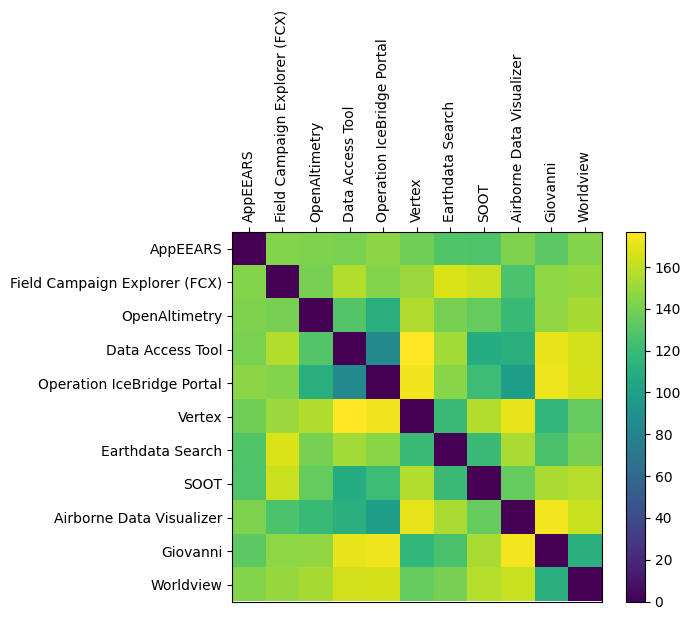

In [8]:
import matplotlib.pyplot as plt

#plt.matshow(df)
fig, ax = plt.subplots()
im = ax.imshow(df_naive)
ax.xaxis.tick_top()
plt.colorbar(im, ax=ax)
ax.set_xticks(numpy.arange(len(alternatives)), labels=alternatives, rotation=90)
ax.set_yticks(numpy.arange(len(alternatives)), labels=alternatives)
plt.show()

# Non-naive Results

In [9]:
df

,AppEEARS,Field Campaign Explorer (FCX),OpenAltimetry,Data Access Tool,Operation IceBridge Portal,Vertex,Earthdata Search,SOOT,Airborne Data Visualizer,Giovanni,Worldview
AppEEARS,0.000000,94.572723,105.328059,131.106827,129.572374,47.843495,73.749576,105.541461,122.857641,43.749286,73.749576
Field Campaign Explorer (FCX),111.242977,0.000000,112.694277,145.945195,135.462172,72.284161,112.583302,132.664992,120.312094,75.993421,91.787799
OpenAltimetry,99.874922,83.516465,0.000000,120.104121,104.761634,66.708320,83.366660,104.522725,103.682207,63.047601,81.700673
Data Access Tool,56.692151,59.581876,51.234754,0.000000,48.218254,40.620192,46.636895,44.721360,63.047601,35.707142,46.097722
Operation IceBridge Portal,72.897188,52.201533,40.926764,69.462220,0.000000,46.368092,50.497525,67.082039,60.000000,51.478151,56.568542
Vertex,131.487642,132.947358,144.308697,173.853387,169.189243,0.000000,109.201648,149.833241,165.227116,88.459030,110.227038
Earthdata Search,106.249706,126.392247,119.058809,148.323970,140.978722,56.347138,0.000000,114.891253,142.126704,66.332496,91.515026
SOOT,76.576759,95.786220,88.459030,103.440804,103.440804,50.744458,45.552168,0.000000,106.418983,55.677644,74.665923
Airborne Data Visualizer,75.993421,39.051248,59.371710,93.674970,79.214898,50.000000,67.453688,86.023253,0.000000,60.415230,63.639610
Giovanni,125.853089,128.549601,136.656504,169.041415,166.883193,79.686887,108.050914,146.628783,164.164552,0.000000,90.829511


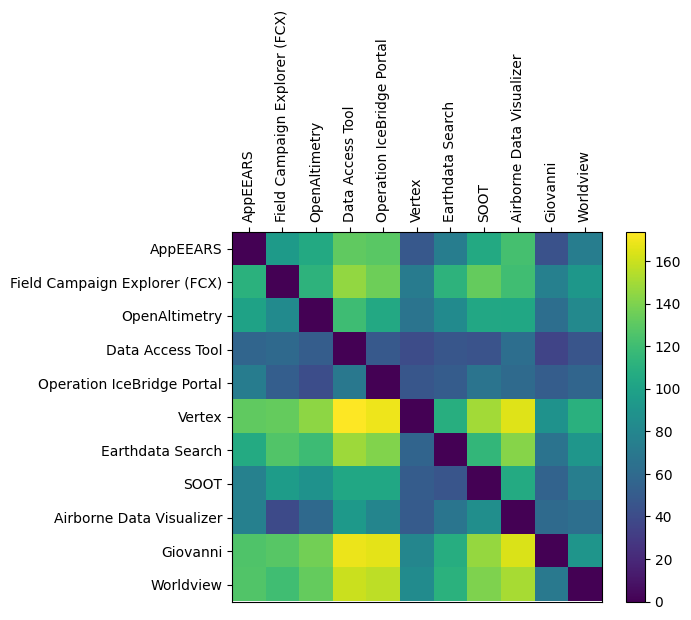

In [10]:
import matplotlib.pyplot as plt

#plt.matshow(df)
fig, ax = plt.subplots()
im = ax.imshow(df)
ax.xaxis.tick_top()
plt.colorbar(im, ax=ax)
ax.set_xticks(numpy.arange(len(alternatives)), labels=alternatives, rotation=90)
ax.set_yticks(numpy.arange(len(alternatives)), labels=alternatives)
plt.show()

# Instructions
Looking row-wise, you're seeing how much the tool in the column header covers the row's functionality. e.g. We can see many tools in the Data Access Tool row cover those same, required functionalities. Most of them probably contain a superset of functionalities. Darker means more overlap.

Looking column-wise, we're seeing how much functionality does the column tool provide to the row-tool. Darker means more overlap.

# Takeaways

if we _only_ analyze the charts, there are a few leading takeaways we can glean. First, looking at _Rows_ the Data Access Tool, Operation IceBirdge Portal, SOOT, and Airborn Data Visualizer appear to have their functionlaities exist in most/all other tools. These would be candidates for convergence to some other tool.

Looking at Columns, Vertex, Earthdata Search, and Giovanni are the tools that do the most things that _other tools_ require. Again, this is based on the data at hand and more discussions should be had here.

## Other Takeaways
- Field Campaign Explorer would be a solid altenrative candidate for Airborn Data Visualizer.
- Vertex and Giovani show very similar scores when looking at functionalities they could provide to other existing tools, we need to discuss _how_ they provide it and if it is indeed transferable to those tools (e.g. variable basd vs collection based)



# Caveats
The similarity scores above are based solely on the fitness for task. We need to look at usage, integrations, and maturity as well.

# Warning

While this similarity in this exercise is useful, it's the start of a conversation. The numbers could be gained such that you'd have a low score (high degree of similarity) but the tools are not doing anything the same. Take a tool that only does a single criteria, and one that does another, single criteria. The scores would probably be around 25 in that case, but that doens't mean those two tools are similar at all.

With enough criteira, though, we remove that case- but there is still a manual overview required here.